In [8]:
import numpy as np          # fundamental package for scientific computing
import xarray as xr

import os
import glob

### Composite Analysis

- compute anomalies
- retrieve composite years

In [9]:
files = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_*.nc'))

In [7]:
temp_anomalies  = []
salt_anomalies  = []
vvel_anomalies  = []
vvel_avg_period_1 = []
vvel_avg_period_2 = []
sigma_anomalies = []
hmxl_anomalies  = []
shf_anomalies  = []
ssh_anomalies  = []
sigma_avg_period_1 = []
sigma_avg_period_2 = []

for i in range(len(files)):
    try:
        ds = xr.open_dataset(files[i])
        print(f"{files[i]} exists")
        # Do further processing with the dataset 'ds' if needed
    except ValueError as e:
        print(f"Error opening dataset from file {files[i]}: {e}")
        # Handle the exception, for example, continue with the next file
        continue
    
    # TEMP
    period1_avg_temp = ds['TEMP'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg_temp = ds['TEMP'].isel(time=slice(45,59)).mean(dim='time')
    difference_temp = period2_avg_temp - period1_avg_temp
    temp_anomalies.append(difference_temp)
    
    # SALT
    period1_avg_salt = ds['SALT'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg_salt = ds['SALT'].isel(time=slice(45,59)).mean(dim='time')
    difference_salt = period2_avg_salt - period1_avg_salt
    salt_anomalies.append(difference_salt)
    
    # VVEL
    period1_avg_vvel = ds['VVEL'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg_vvel = ds['VVEL'].isel(time=slice(45,59)).mean(dim='time')
    difference_vvel = period2_avg_vvel - period1_avg_vvel
    vvel_anomalies.append(difference_vvel)
    vvel_avg_period_1.append(period1_avg_vvel)
    vvel_avg_period_2.append(period2_avg_vvel)
    
    # SIGMA_2
    period1_avg_sigma = ds['SIGMA_2'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg_sigma = ds['SIGMA_2'].isel(time=slice(45,59)).mean(dim='time')
    difference_sigma = period2_avg_sigma - period1_avg_sigma
    sigma_anomalies.append(difference_sigma)
    sigma_avg_period_1.append(period1_avg_sigma)
    sigma_avg_period_2.append(period2_avg_sigma)
    
    # HMXL
    period1_avg_hmxl = ds['HMXL'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg_hmxl = ds['HMXL'].isel(time=slice(45,59)).mean(dim='time')
    difference_hmxl = period2_avg_hmxl - period1_avg_hmxl
    hmxl_anomalies.append(difference_hmxl)
    
    # SHF
    period1_avg_shf = ds['SHF'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg_shf = ds['SHF'].isel(time=slice(45,59)).mean(dim='time')
    difference_shf = period2_avg_shf - period1_avg_shf
    shf_anomalies.append(difference_shf)
    
    # SSH
    period1_avg_ssh = ds['SSH'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg_ssh = ds['SSH'].isel(time=slice(45,59)).mean(dim='time')
    difference_ssh = period2_avg_ssh - period1_avg_ssh
    ssh_anomalies.append(difference_ssh)


/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1231.001.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1231.003.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1231.004.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1231.020.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1251.010.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1281.010.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1281.012.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1281.015.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1281.017.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1281.020.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1301.001.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1301.015.nc

In [8]:
# Combine the list of 3D fields into a single xarray dataset
temp_anomaly = xr.concat(temp_anomalies, dim='file').mean(dim='file')
salt_anomaly = xr.concat(salt_anomalies, dim='file').mean(dim='file')
vvel_anomaly = xr.concat(vvel_anomalies, dim='file').mean(dim='file')
vvel_p1 = xr.concat(vvel_avg_period_1, dim='file').mean(dim='file')
vvel_p2 = xr.concat(vvel_avg_period_2, dim='file').mean(dim='file')
sigma_anomaly = xr.concat(sigma_anomalies, dim='file').mean(dim='file')
hmxl_anomaly = xr.concat(hmxl_anomalies, dim='file').mean(dim='file')
shf_anomaly = xr.concat(shf_anomalies, dim='file').mean(dim='file')
ssh_anomaly = xr.concat(ssh_anomalies, dim='file').mean(dim='file')
sigma_p1 = xr.concat(sigma_avg_period_1, dim='file').mean(dim='file')
sigma_p2 = xr.concat(sigma_avg_period_2, dim='file').mean(dim='file')

In [10]:
temp_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/temp_anomaly.nc')
salt_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/salt_anomaly.nc')
vvel_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/vvel_anomaly.nc')
vvel_p1.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/vvel_p1.nc')
vvel_p2.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/vvel_p2.nc')
sigma_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/sigma_anomaly.nc')
hmxl_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/hmxl_anomaly.nc')
shf_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/shf_anomaly.nc')
ssh_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/ssh_anomaly.nc')
sigma_p1.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/sigma_p1.nc')
sigma_p2.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/sigma_p2.nc')

# Streamfunction composite analysis

In [13]:
stfs = ['BSF', 'dMOC', 'sMOC']
stf_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/'

In [14]:
bsf_anomalies  = []
dmoc_anomalies  = []
smoc_anomalies  = []

for stf in stfs:

    ds = xr.open_dataset(stf_path+stf+'composite-test.nc')

    period1_avg = ds.isel(time=slice(0,35)).mean(dim='time')  
    period2_avg = ds.isel(time=slice(45,59)).mean(dim='time')
    difference = period2_avg - period1_avg
    
    difference.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/'+stf+'_anomaly.nc')

# Density annual composite

In [5]:
ds = xr.open_dataset(files[0])

In [39]:
sigma_annual = []

for i in range(len(files)):
    
    ds = xr.open_dataset(files[i])
    
    # select density from dataset
    entire_sigma = ds['SIGMA_2'].isel(time=slice(0,60))
    
    # fix time coordinate conflict by creating new time coordinate
    entire_sigma = entire_sigma.rename({'time': 'new_time'})
    entire_sigma['new_time'] = range(60)
    if 'time' in entire_sigma.coords:
        entire_sigma = entire_sigma.drop('time')
    entire_sigma = entire_sigma.rename({'new_time': 'time'})
    
    # append datarray to list
    sigma_annual.append(entire_sigma)
    
    print('check ', i+1, '/', len(files))

check  1 / 13
check  2 / 13
check  3 / 13
check  4 / 13
check  5 / 13
check  6 / 13
check  7 / 13
check  8 / 13
check  9 / 13
check  10 / 13
check  11 / 13
check  12 / 13
check  13 / 13


In [40]:
sigma_annual = xr.concat(sigma_annual, dim='file').mean(dim='file')

In [42]:
sigma_annual.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/sigma_composite_annual.nc')

# Plot output

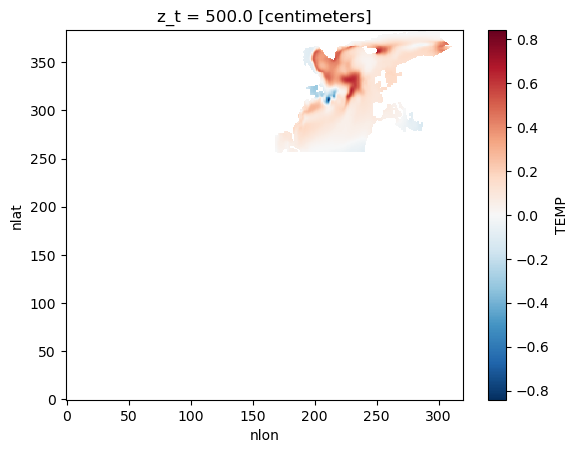

In [6]:
temp_anomaly.isel(z_t=0).plot()